In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from StanfordCars import *
from CarsModelClass import *

%matplotlib inline

def create_ROC_Curves(y, ypred, classes=[1,2,3]):
    fpr = dict()
    tpr = dict()
    auc_value = dict()
    
    # --- Binarize the true and preds
    y_true_bin = label_binarize(y, classes)
    #y_pred_bin = label_binarize(ypred, classes)
    #print(y_true_bin.shape)
    
    labels = {
        1: "ROC Curve for Convertibles",
        2: "ROC Curve for Sedans",
        3: "ROC Curve for SUVs/Trucks/Vans"
    }
    
    # --- Get FPR, TPR & AUC for each class
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:,i], ypred[:,i])
        #print(len(fpr[i]))
        auc_value[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=labels[i+1]+" (area = {:.2f})".format(auc_value[i]),
                 linestyle = ":", lw=3)
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.legend(loc="lower right", fontsize=15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title("Multi-class ROC for Classifying Car Images: One class vs Rest", fontsize = 18)
    plt.show()

Using TensorFlow backend.


In [2]:
cars_model = cars_model_class(cnn="VGG16", no_of_classes=5)   
Xtrn = cars_model.Xtrain
xtst = cars_model.xtest
Ytrn = cars_model.Ytrain
ytst = cars_model.ytest

cars_PCA = PCA(n_components=500)
Xtrn_500 = cars_PCA.fit_transform(Xtrn)
xtst_500 = cars_PCA.transform(xtst)
print(np.sum(cars_PCA.explained_variance_ratio_))

logreg = LogisticRegression(C=10, verbose=True, solver="saga", max_iter=1000) # C: Inverse of regularization strength; 
logreg.fit(Xtrn_500, Ytrn)

0.8927422451959902


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 193 epochs took 12 seconds
convergence after 91 epochs took 4 seconds
convergence after 366 epochs took 18 seconds
max_iter reached after 49 seconds


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 47 seconds


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min finished


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=True,
                   warm_start=False)

Train Score for the Logit Model: 0.799
Test Score for the Logit Model: 0.766
F1 score for logistic regression: 0.7753596937471825
Confusion matrix: 

 [[805 212   8   4   2]
 [164 794  68   8  12]
 [ 16  94 471  27  11]
 [  4  11  57 254   5]
 [  5  25  19   5 156]]


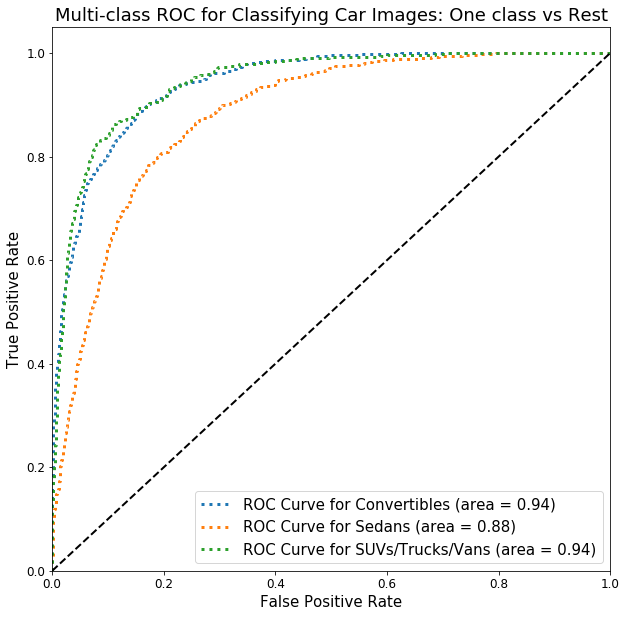

In [3]:
ytest_labels = logreg.predict(xtst_500)
ytest_prob = logreg.predict_proba(xtst_500)
train_score = logreg.score(Xtrn_500, Ytrn)
test_score = logreg.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score))
print("Test Score for the Logit Model: {:.3f}".format(test_score))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob)

/Users/bhanuyerra/Documents/MetisDatScienceBootcamp/Projects/Metis_Prj3/Code/CarsModelClass.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fileNames_df.sort_values(str(int(yfalse)), ascending=False, inplace=True)


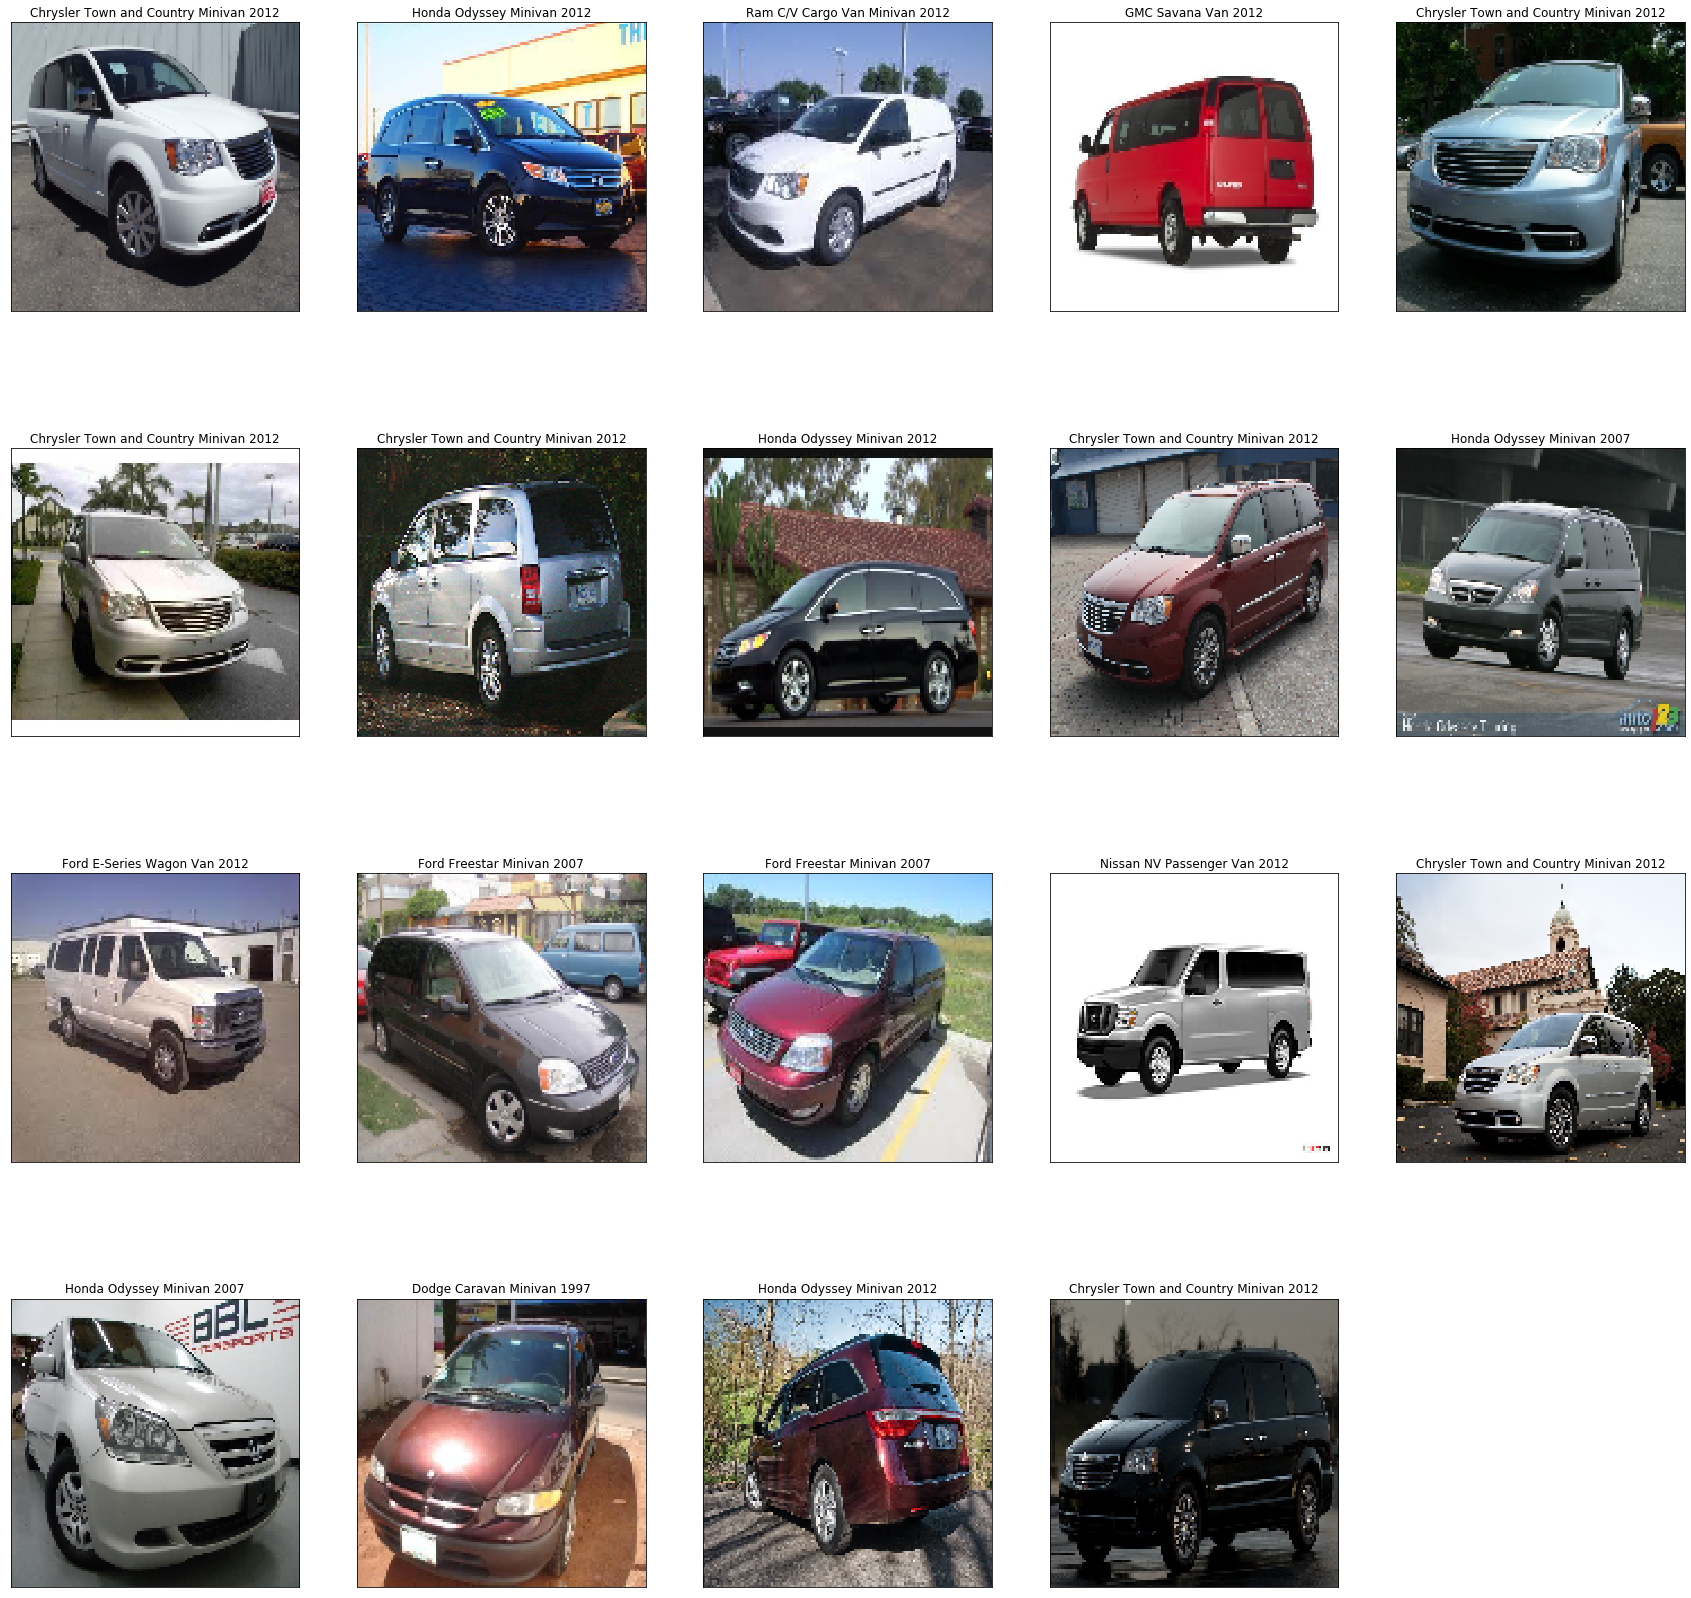

In [4]:
top20_12 = cars_model.get_misclass_topFileNames(ytest_labels, ytest_prob, 5, 3, 30)
GetStandfordCars().show_select_images(top20_12)

In [5]:
randomforest = RandomForestClassifier(n_estimators=500, max_depth=10, random_state = 333)
randomforest.fit(Xtrn_500, Ytrn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=333,
                       verbose=0, warm_start=False)

Train Score for the Logit Model: 0.863
Test Score for the Logit Model: 0.639
F1 score for logistic regression: 0.5902404170446978
Confusion matrix: 

 [[755 276   0   0   0]
 [185 852   9   0   0]
 [ 27 327 260   5   0]
 [ 13  82 100 136   0]
 [  9 107  24   3  67]]


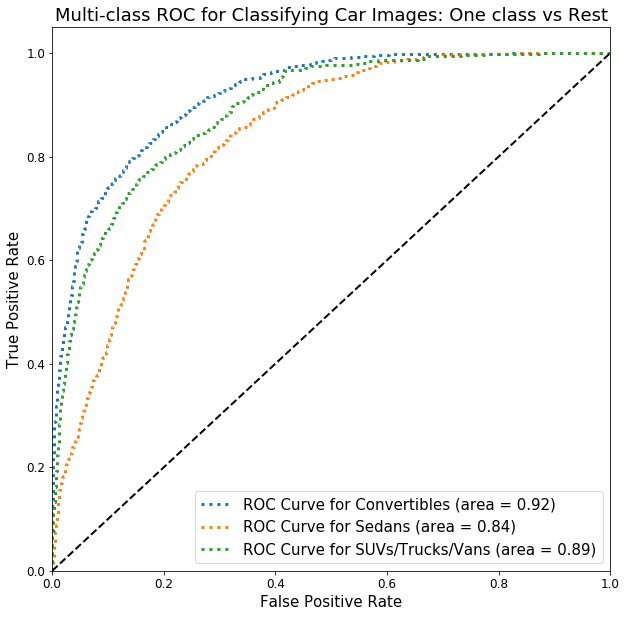

In [6]:
ytl_rf = randomforest.predict(xtst_500)
ytp_rf = randomforest.predict_proba(xtst_500)
train_score_rf = randomforest.score(Xtrn_500, Ytrn)
test_score_rf = randomforest.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_rf))
print("Test Score for the Logit Model: {:.3f}".format(test_score_rf))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytl_rf, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytl_rf))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytp_rf)

In [7]:
cars_svc = SVC(kernel='poly', gamma='auto', probability=True, verbose=True)
cars_svc.fit(Xtrn_500, Ytrn)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True)

Train Score for the Logit Model: 1.000
Test Score for the Logit Model: 0.770
F1 score for logistic regression: 0.7824699729452402
Confusion matrix: 

 [[803 213  12   3   0]
 [164 807  67   2   6]
 [ 16  97 468  27  11]
 [  2   8  62 255   4]
 [  3  29  14   6 158]]


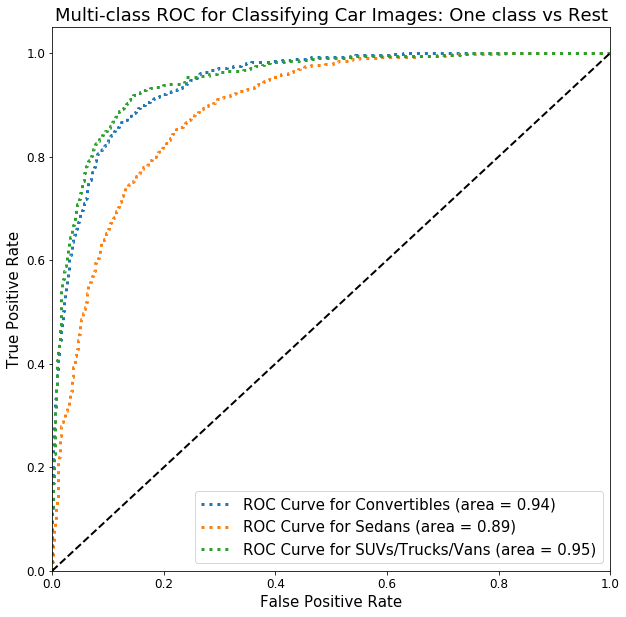

In [8]:
ytl_svc = cars_svc.predict(xtst_500)
ytp_svc = cars_svc.predict_proba(xtst_500)
train_score_svc = cars_svc.score(Xtrn_500, Ytrn)
test_score_svc = cars_svc.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_svc))
print("Test Score for the Logit Model: {:.3f}".format(test_score_svc))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytl_svc, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytl_svc))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytp_svc)

In [9]:
dump(logreg, "../Models/VGG16/LogReg_wPCA_Model2_5Class.joblib")
dump(cars_svc, "../Models/VGG16/SVC1_wPCA_Model2_5Class.joblib")
dump(randomforest, "../Models/VGG16/RFq_wPCA_Model2_5Class.joblib")
#dump(cars_lrcv, "../Models/MobileNetV2/LRCV_wPCA_Model2_5Class.joblib")

['../Models/VGG16/RFq_wPCA_Model2_5Class.joblib']